# 결측치?

```
세상의 모든 데이터는 완벽하지 않다. 그래서 누락된 값, 결측치(Missing Value)가 존재한다. 데이터서는 이 값을 None, NaN으로 표현한다. 이러한 결측치는 데이터 기반으로 머신러닝 모델 학습 품질에 큰 영향을 주는 값이된다. Python 대표적인 머신러닝 모듈인 Scikit-learn estimator 같은 일부 알고리즘은 데이터로 사용하는 모든 값이 의미가 있다는 가정을 하고 있기 때문이다. 그래서 모델링 이전에 이 결측치를 어떻게 처리할지 정하는게 중요하다.

데이터는 다면적인 데이터셋과 시계열 데이터 크게 두 가지로 볼 수 있다. 전처리 단계에서 각 데이터셋의 결측치 처리 방법에 대해서 정리해보자.
```

# 단면 데이터 셋

### 처리 방법
- 방치
- 제거
- Mean / Medain
- Frequent / Zero / Constant
- KNN
- MICE


#### 방치 
```
결측치 처리에서 가장 쉬운 방벙이다. 모델링 과정에서 알고리즘에서 결측치를 무시해주는 파라미터를 넣어 처리할 수 있다. 하지만 이 기능이 없는 경우 모델이 쓰레기가 된다.
```

#### 제거
```
결측치를 가진 데이터를 제거하는 방법이다. 결측치가 가진 하나의 데이터를 제거할 수 있고 결측치를 포함한 피처를 제거할 수 있다. 단, 이 방법은 중요한 정보를 가진 데이터가 제거될 위험성이 있다.
```

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    0 : np.random.randint(0, 5, 5),
    1 : np.random.randint(0, 5, 5),
    2 : np.random.randint(0, 5, 5)
})

for _ in range(3):
    col = np.random.randint(2)
    row = np.random.randint(5)
    df.loc[row, col] = np.NAN

df

,0,1,2
0,0.0,3.0,0
1,4.0,NaN,1
2,0.0,NaN,0
3,NaN,1.0,0
4,0.0,2.0,2


In [ ]:
df.dropna()

,0,1,2
0,0.0,3.0,0
4,0.0,2.0,2


#### Mean / Median

```
결측치를 다른 값들의 평균 혹은 중앙값으로 대체하는 방법.
이 방법은 쉽고 빠르게 결측치를 처리할 수 있고 숫자 범위가 작은 데이터 셋에서 잘 작동한다는 장점이 있다.
단점은 다른 피처와 상관을 고려하지 않는다. 인코딩된 범주형 변수에 사용할 수 없다. 정확성이 떨어진다.
```

In [ ]:
df

,0,1,2
0,0.0,3.0,0
1,4.0,NaN,1
2,0.0,NaN,0
3,NaN,1.0,0
4,0.0,2.0,2


In [ ]:
# Mean
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
df_impute = pd.DataFrame(imp_mean.fit_transform(df))

df_impute

,0,1,2
0,0.0,3.0,0.0
1,4.0,2.0,1.0
2,0.0,2.0,0.0
3,1.0,1.0,0.0
4,0.0,2.0,2.0


In [ ]:
# Median
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='median')
df_impute = pd.DataFrame(imp_mean.fit_transform(df))

df_impute

,0,1,2
0,0.0,3.0,0.0
1,4.0,2.0,1.0
2,0.0,2.0,0.0
3,0.0,1.0,0.0
4,0.0,2.0,2.0


#### Frequent / Zero / Constant
```
Frequent : 가장 많이 나왔던 값으로 대체한다. 범주형 변수에서도 사용이 가능하다.
Zero  : 결측치를 0으로 대체한다.
Constant : 결측치를 처리할 값을 직접 지정한다.

이 방법 역시 빠르게 처리가 가능하다. 평균과 중앙값과 다른점은 범주형 변수에서도 사용이 가능하다는 점. 단점은 역시 피처간 상관을 고려되지 않음.
```

In [ ]:
df

,0,1,2
0,0.0,3.0,0
1,4.0,NaN,1
2,0.0,NaN,0
3,NaN,1.0,0
4,0.0,2.0,2


In [ ]:
# Frequency
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='most_frequent')
df_impute = pd.DataFrame(imp_mean.fit_transform(df))

df_impute

,0,1,2
0,0.0,3.0,0.0
1,4.0,1.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,2.0,2.0


In [ ]:
# Zero
df.fillna(0) # 0을 수정하면 Constant

,0,1,2
0,0.0,3.0,0
1,4.0,0.0,1
2,0.0,0.0,0
3,0.0,1.0,0
4,0.0,2.0,2


#### KNN
```
KNN(K-nearest neighbours) 피처 특성을 이용해 가장 닮은 k개의 데이터를 찾아서 그룹화한다.

장점 : mean, median, frequent 보다 성능 좋다. (데이터셋에 따라 좋지 못할 수 있음)
단점 : 이상치(outlier)에 민감하다.
```

In [ ]:
df

,0,1,2
0,0.0,3.0,0
1,4.0,NaN,1
2,0.0,NaN,0
3,NaN,1.0,0
4,0.0,2.0,2


In [ ]:
# !pip install impyute

In [ ]:
from impyute.imputation.cs import fast_knn
df_impute = pd.DataFrame(fast_knn(df.values, k =2))

df_impute


,0,1,2
0,0.0,3.000000,0.0
1,4.0,1.554201,1.0
2,0.0,1.828427,0.0
3,0.0,1.000000,0.0
4,0.0,2.000000,2.0


#### MICE
```
MICE(Multiple Implutation by Chained Equation) 방식은 다중대체 하는 방법으로 굉장히 복잡한 방법으로 결측값을 다룬다.
1. 결측치가 포함된 원 데이터에서 결측치를 유사값들로 대체하여 데이터셋을 만들어낸다.
2. 이렇게 만들어진 데이터 셋들을 각각 통계모델로 분석해 최종적으로 하나의 데이터셋을 만들어낸다.
```
![image.png](https://blog.kakaocdn.net/dn/dmJPLq/btqGxPRY6Ji/lovcHXD2ef5PDDog0uG2A1/img.png)

In [ ]:
df

,0,1,2
0,0.0,3.0,0
1,4.0,NaN,1
2,0.0,NaN,0
3,NaN,1.0,0
4,0.0,2.0,2


In [ ]:
from impyute.imputation.cs import mice
df_imputed = pd.DataFrame(mice(df.values))

df_imputed

,0,1,2
0,0.000000,3.0,0.0
1,4.000000,-0.5,1.0
2,0.000000,3.0,0.0
3,2.666667,1.0,0.0
4,0.000000,2.0,2.0


# 시게열데이터의 결측치
```
시계열 데이터에서는 결측치를 제거하게 되는 경우 그 시점의 분산과 평균의 왜곡을 가져온다. 시계열 데이터에서 제거해도 전형 영향이 없는 데이터면 괜찮지만 그렇지 않은 경우 분석결과에 직결되어 치명적인 영향을 줄 수 있다. 이러한 시계열 데이터를 처리하는 방법으로
- LOCF(Last observation carried Forward) : 직전 관측값으로 대체
- NOCB(Next observation carried Backward) : 직후 관측값으로 대체
- Moving Average / Median : 직전 N window의 (평균 / 중앙값)으로 대체

3가지 방법으로 처리하기 어려운 경우가 있다. 결측치가 변곡점이 포함됐을 경우다. 이 경우 보간법(interpolation)을 사용한다.
```
### 보간법 : 기존에 알고있는 특정 지점이나 지역의 속성값을 이용하여 알고자 하는 지점 또는 지역의 속성값을 찾아내는 방법.
```
보간법의 종류에는 선형, 다항식, 스플라인, 지수, 로그, 라그랑지, 뉴튼, 2차원, 공간, 크리깅 등이 있다. 이번에는 선형, 비선형, 스플라인 3가지를 다룬다.

- 선형 보간법
: 가장 간단한 방법으로 알고자 하는 함수가 직선이라는 가정하고 함수값을 추정. 단순히 알려진 데이터를 선으로 이어주면 된다. 가장 간단하고 빠르지만 정확성은 좋지 못하다.

- 다항함수 보간법
: 주어진 점들을 지나는 다항식을 찾는 보간법

- 스플라인 보간법
: 각 구간에서 낮은 차원의 다항식을 사용한다. 앞, 뒤 구간의 다항식들과 자연스럽게 연결될 수 있는 것으로 선택. 각 점에서 앞, 뒤 스플라인 함수가 미분이 가능해야하고 곡률도 같아야 한다.

```


### 다양한 평균
- 이동평균(Moving Average)</br>
: 이동평균은 일반 평균과는 다르게 한정되어있는 수 집합의 모든 값을 대상으로 평균으로 산출하지 않고 일정한 크기의 부분집합을 평균 계산에 활용하는 방법이다. 이동 평균의 종류에는 단순 이동평균, 가중 이동평균, 기하 이동평균, 누적 이동평균, 지수 이동평균 등이 있다.
</br>

- 최소자승법(Least Square Metohd)</br>
: 최소제곱법으로 더 많이 사용되고 있는 것 같다. **'어떤 모델의 파라미터를 구하는 한 방법으로 데이터와의 거리의 제곱합이 최소화하도록 모델의 파라미터를 구성하는 방법'**이다. 회귀모델에서 회귀선을 찾는 대표적인 방법 중 하나이다.

![img](https://i.namu.wiki/i/TufEDco-W8KLWqhuuAsP7JLxprbgha0DrY5UEnCL7GPYVCoV6BtDlkzCkqLq8jRP_G6HyuoOXx9LTb1bFGhAGJk0DlJN_EtJHGwuTTRbvlyNgDfJjn7YnwoT_0YlwN1kMIl2O6CIfMhpWVb8zyaCTw.svg)

- 지수평활법
: 이동평균 중 하나의 방법으로 최근의 자료에 더 큰 가중치를 주고 현 시점에서 멀수록 작은 가중치를 주는 방법이다. 이 가중치를 **평활상수라고 하는데 이는 SSE를 최소로하는 값으로 선택**한다.

![img](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbexxjT%2Fbtq2CJCANif%2Fh2dPyAR6l1DNUSadNZuZkk%2Fimg.png)

![img](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Flgw7z%2Fbtq2DtzgIdN%2F1TtbI0kHTRFmZUBrqiFYs1%2Fimg.png)

#### 이동평균
이동평균은 부분집합의 크기를 먼저 설정해줘야한다. 예시에서는 모든 부분집합은 2로 고정한다. (ex. 2일의 이동평균 값은 1과 2의 평균)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
    0 : np.random.randint(0, 5, 5),
})

df

,0
0,3
1,3
2,4
3,0
4,1


In [61]:
# 단순 이동평균
simple_MA = [np.NaN]
weight_MA = [np.NaN]
for idx, row in df.iloc[1:].iterrows():
  simple_MA.append(int((df[0].iloc[idx-1] + row[0])/2))
  weight_MA.append(((df[0].iloc[idx-1]*0.3 + row[0] * 0.7)/2)) #가중 이동평균은 가까운 데이터를 7 멀리있는 데이터를 3의 가중치로 한다.

df['simple_MA'] = simple_MA
df['weight_MA'] = weight_MA


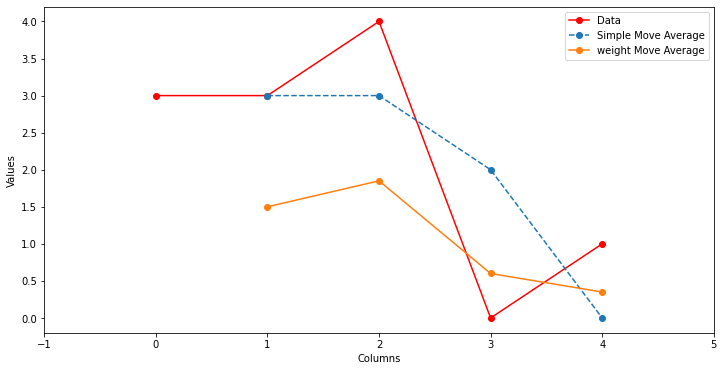

In [67]:
plt.figure(figsize=(12,6))
plt.plot(df[0], 'or-', label = 'Data')
plt.plot(df['MA_col1'], 'o--', label = 'Simple Move Average')
plt.plot(df['weight_MA'], 'o-', label = 'weight Move Average')
plt.xlabel('Columns')
plt.xticks(range(-1,6))
plt.ylabel('Values')
plt.legend()
plt.show()

In [68]:
# 지수 이동평균
def myEWMA(data, span):
  # 지수 이동 평균을 계산해서 저장할 리스트
  ewma=[0]*len(data)
  # 지수 이동 평균의 분자
  molecule=0
  # 지수 이동 평균의 분모
  denominator=0
  # 값에 곱해지는 가중치
  alpha = 2.0 / (1.0 + span)

  for i in range(len(data)):
    # 분자 계산 data+(1-alpha)앞의 데이터
    molecule = (data[i] + (1.0-alpha)*molecule)
    # 분모 계산 (1-alpha)의 i승
    denominator+=(1-alpha)**i
    print("index:",i)
    print("molecule:",molecule)
    print("denominator:",denominator)
    # 지수 이동 평균 계산
    ewma[i] = molecule/denominator
    print("ewma",ewma[i])
    print("="*100)
  
  return ewma

In [73]:
df['EWMA'] = myEWMA(df[0],2)

index: 0
molecule: 3.0
denominator: 1.0
ewma 3.0
index: 1
molecule: 4.0
denominator: 1.3333333333333335
ewma 2.9999999999999996
index: 2
molecule: 5.333333333333334
denominator: 1.4444444444444446
ewma 3.692307692307692
index: 3
molecule: 1.7777777777777781
denominator: 1.4814814814814816
ewma 1.2000000000000002
index: 4
molecule: 1.5925925925925928
denominator: 1.4938271604938274
ewma 1.0661157024793388


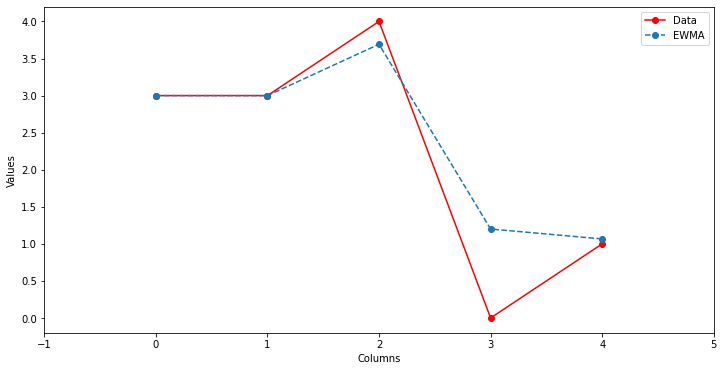

In [74]:
plt.figure(figsize=(12,6))
plt.plot(df[0], 'or-', label = 'Data')
plt.plot(df['EWMA'], 'o--', label = 'EWMA')
plt.xlabel('Columns')
plt.xticks(range(-1,6))
plt.ylabel('Values')
plt.legend()
plt.show()